# Problem 1

(1) Consider the cubic polynomial $z^3-1$.  The roots in the complex plane are $1, e^{2 \pi i/3}$ and $e^{-2 \pi i /3}$. 

Write a *python function* that takes as input four floting point numbers $x_0, x_1, y_0, y_1$ and an integer $n$. The output will be a graphical plot (on the screen). The plot will have a resolution of $n \times n$ pixels and will use three colours of your choice. 

*Description of the plot*: given a point with coordinates $(p,q)$ in your plot, apply Newton's method (given below) with initial condition $(-2+4p/n + (-2+4q/n)i$ where here $i^2 = -1$.  If Newton's method appears to converge to $e^{2\pi ik}/3$ colour the point with coordinates $(p,q)$ with the $k$-th colour.  You are free to choose


[mpf('1.7305836591619015'), mpf('1.7305167049424388'), mpf('0.0017343153538220879')] 0.00173431535382209 green
[mpf('1.730812042379158'), mpf('1.7306822546243297'), mpf('0.0015111046500175893')] 0.00151110465001759 green
[mpf('1.731014108625643'), mpf('1.7308337218499605'), mpf('0.001313798890201383')] 0.00131379889020138 green
[mpf('1.7311921480800521'), mpf('1.7309723344336974'), mpf('0.0011398912045309543')] 0.00113989120453095 green
[mpf('1.7313482997827871'), mpf('1.7310991669100151'), mpf('0.00098704196826948404')] 0.000987041968269484 green
[mpf('1.7314845556318279'), mpf('1.7312151588642213'), mpf('0.00085307803832185226')] 0.000853078038321852 green
[mpf('1.7316027658276596'), mpf('1.7313211323516537'), mpf('0.00073599045226067038')] 0.00073599045226067 green
[mpf('1.7317046454171268'), mpf('1.7314178082189009'), mpf('0.00063393074845848247')] 0.000633930748458482 green
[mpf('1.7317917816143307'), mpf('1.7315058211949832'), mpf('0.00054520607661305044')] 0.00054520607661305 gr

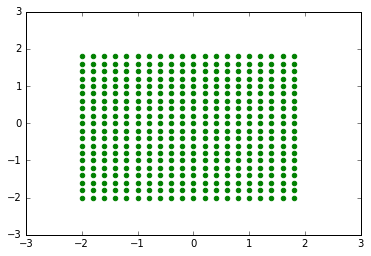

In [11]:
%matplotlib inline
## Newton's method that allows for complex number input.
import sympy
import numpy
import mpmath
import matplotlib

# Define some things for mpmath.
mpmath.dps = 20
mpmath.prec = mpmath.dps * 3.34
mpmath.pretty = True

colors = [ 'red', 'blue', 'green' ]

# Define the symbolic functions.
sym_x = sympy.Symbol("x")
sym_i = sympy.Symbol("i")
sym_func = (sym_x ** 3) - 1

roots = [
    mpmath.mpc(1, 0),
    mpmath.exp(mpmath.mpc(0, (2*mpmath.pi) / 3)), 
    mpmath.exp(mpmath.mpc(0, (-2*mpmath.pi) / 3))
]

def newtons_method(f):
    return sym_x - f / sympy.diff(f,sym_x)

newton_iterator = sympy.lambdify(sym_x, newtons_method(sym_func), "mpmath")

def classify_point(p, q, n):
    real = -2 + (4 * (p / n))
    imaginary = -2 + (4 * (q / n))
    complex_number = mpmath.mpc(real, imaginary)
    for i in range(0, 5):
        complex_number = newton_iterator(complex_number)
    distances = [x.real for x in 
                 [mpmath.sqrt((complex_number - root) * mpmath.conj(complex_number - root)) for root in roots]]
    print(distances, min(distances), colors[distances.index(min(distances))])
    return colors[distances.index(min(distances))]
    
    

def problem_1(x_0, y_0, x_1, y_1, n):
    x_range = numpy.arange(x_0, x_1, numpy.abs(x_0 - x_1) / n)
    y_range = numpy.arange(y_0, y_1, numpy.abs(y_0 - y_1) / n)
    for x, y, the_color in [(x, y, classify_point(x, y, n)) for y in y_range for x in x_range]:
        matplotlib.pyplot.scatter(x, y, color=the_color)

problem_1(-2, -2, 2, 2, 20)